In [117]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter
import itertools
import imageio

ModuleNotFoundError: No module named 'imageio'

In [107]:
# Using readlines()
file1 = open('aoc-13-ex', 'r')
file1 = open('aoc-13', 'r')
#file1 = open('input.txt', 'r')
Lines = file1.readlines()
Lines_2 = Lines
Lines = [x.replace('\n','').split(',') for x in Lines]
#print(Lines)


655
447
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
###..#....#..#.####...##.###....##.####.
#..#.#....#..#.#.......#.#..#....#.#....
###..#....####.###.....#.#..#....#.###..
#..#.#....#..#.#.......#.###.....#.#....
#..#.#....#..#.#....#..#.#....#..#.#....
###..####.#..#.#.....##..#.....##..#....


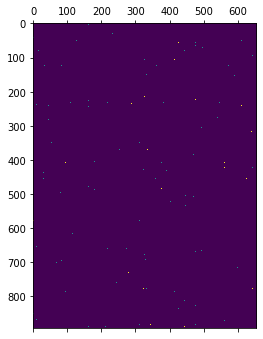

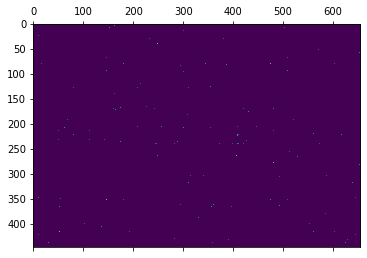

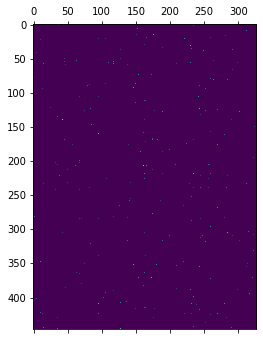

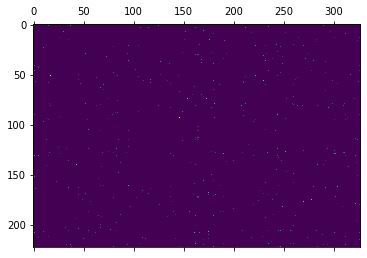

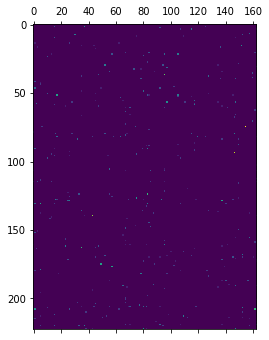

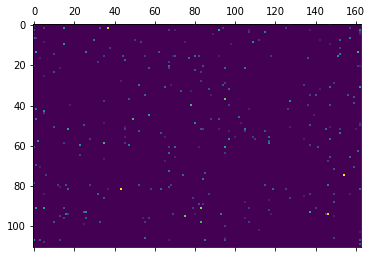

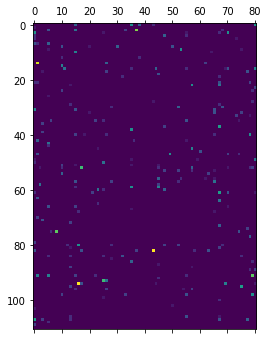

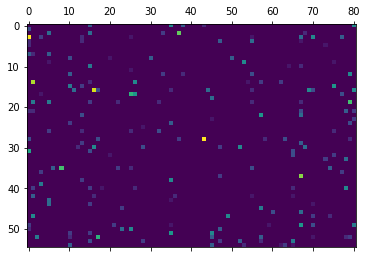

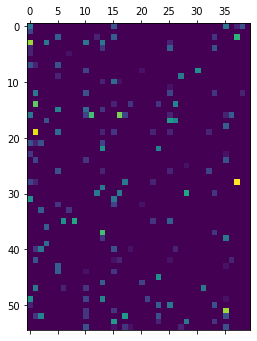

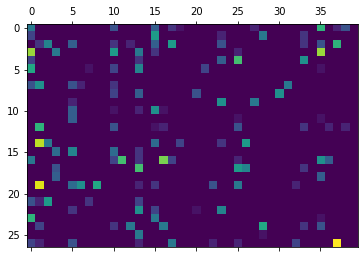

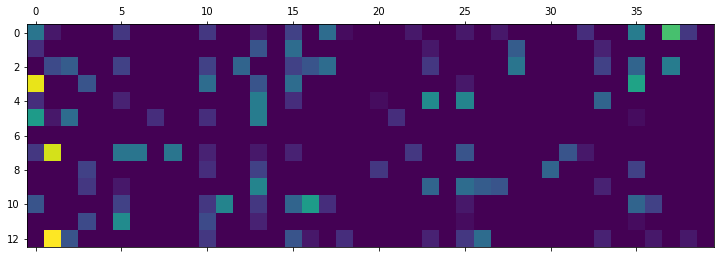

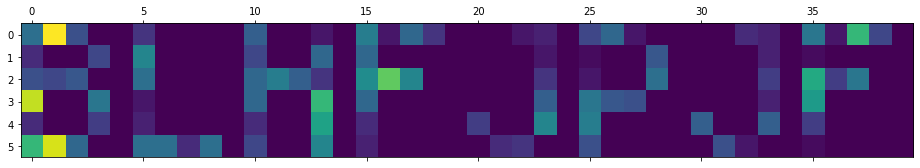

In [119]:
cor = []
fold = []
x = []
y = []
for ele in Lines:
    if not ele[0] == '' and not ele[0][0] == 'f':
        cor.append((int(ele[0]),int(ele[1])))
    if not ele[0] == '' and ele[0][0] == 'f':
        fold.append(ele)
#print(cor)
#print(fold)
for ele in cor:
    x.append(ele[0])
    y.append(ele[1])
#print(max(x),max(y))
#print(x)
#print(y)

x_max = -1
y_max = -1

fold = [x[0].split(' ') for x in fold]    
fold = [x + x[2].split('=') for x in fold]    
#print(fold)
for ele in fold:
    if ele[3] == 'y':
        if int(ele[4]) > y_max:
            y_max =  int(ele[4])
    if ele[3] == 'x':
        if int(ele[4]) > x_max:
            x_max =   int(ele[4])      
print(x_max)        
print(y_max)        

m = np.matrix(np.zeros((x_max*2+1, y_max*2+1)))
#print(m)

for ele in cor:
    m[ele] = 1

def yFold(matrix,axis):
    return matrix[:,:axis] + np.flip(matrix[:,axis+1:],1)

def xFold(matrix,axis):
    return matrix[:axis,:] + np.flip(matrix[axis+1:,:],0)


print(m.H)

r = m
c = 0
for ele in fold:
    if ele[3] == 'x':
        r = xFold(r,int(ele[4]))
    if ele[3] == 'y':
        r = yFold(r,int(ele[4]))
    r[r > 1] += 5
    plt.matshow(r.H)
    plt.savefig(str(c)+'.png')
    c+=1

r_2 = r.H

charar = np.chararray((r_2.shape),unicode=True)
charar[:] = '.'
#print(np.where((r>0)))
where = np.where((r_2>0))
for i in range(len(where[0])):
    charar[where[0][i],where[1][i]] = '#'
#print(charar)

for ele in charar:
    str_out = ''
    #print(ele)
    for x in ele:
        #print(x)
        str_out += x
    print(str_out)



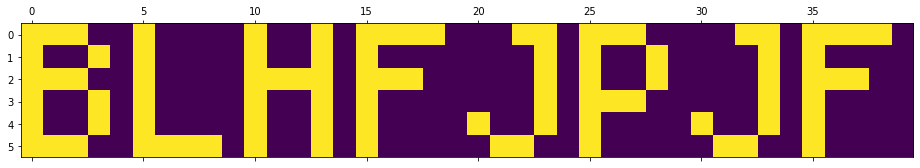

In [112]:
r_2[r_2 > 1] = 1
plt.matshow(r_2)